Codigo TensorFlow

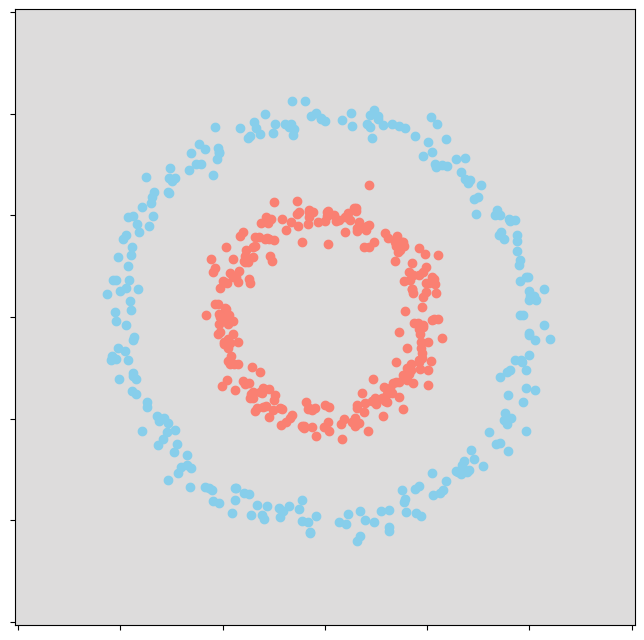

In [7]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#se crean datos artificales de dos circulos
#dos anillos concentricos de datos

X, Y = make_circles(n_samples=500,factor=0.5,noise=0.05)

#resolucion del mapa de prediccion
res = 100

#cordenadas del mapa de prediccion
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

#imput con cada combo de coordenadas del mapa de prediccion
_px = np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)


#objeto vacio a 0.5 del mapa de prediccion
_py = np.zeros((res,res)) +0.5

#visualizacion del mapa de prediccion
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_py, cmap="coolwarm",vmin=0,vmax=1)

#visulaizacion nube de datos
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False,labelleft=False)

Step 0 / 1000 - Loss =  0.36126146 - Acc = 0.546
Step 25 / 1000 - Loss =  0.2162352 - Acc = 0.678
Step 50 / 1000 - Loss =  0.1955867 - Acc = 0.72
Step 75 / 1000 - Loss =  0.18203789 - Acc = 0.746
Step 100 / 1000 - Loss =  0.17083667 - Acc = 0.766
Step 125 / 1000 - Loss =  0.160377 - Acc = 0.784
Step 150 / 1000 - Loss =  0.15155451 - Acc = 0.808
Step 175 / 1000 - Loss =  0.14334147 - Acc = 0.832
Step 200 / 1000 - Loss =  0.13479733 - Acc = 0.856
Step 225 / 1000 - Loss =  0.12568131 - Acc = 0.872
Step 250 / 1000 - Loss =  0.116288215 - Acc = 0.88
Step 275 / 1000 - Loss =  0.10669041 - Acc = 0.908
Step 300 / 1000 - Loss =  0.09720441 - Acc = 0.936
Step 325 / 1000 - Loss =  0.08779234 - Acc = 0.952
Step 350 / 1000 - Loss =  0.07853478 - Acc = 0.972
Step 375 / 1000 - Loss =  0.07025605 - Acc = 0.982
Step 400 / 1000 - Loss =  0.06268054 - Acc = 0.99
Step 425 / 1000 - Loss =  0.056111746 - Acc = 0.996
Step 450 / 1000 - Loss =  0.050147325 - Acc = 0.996
Step 475 / 1000 - Loss =  0.045002524 - 

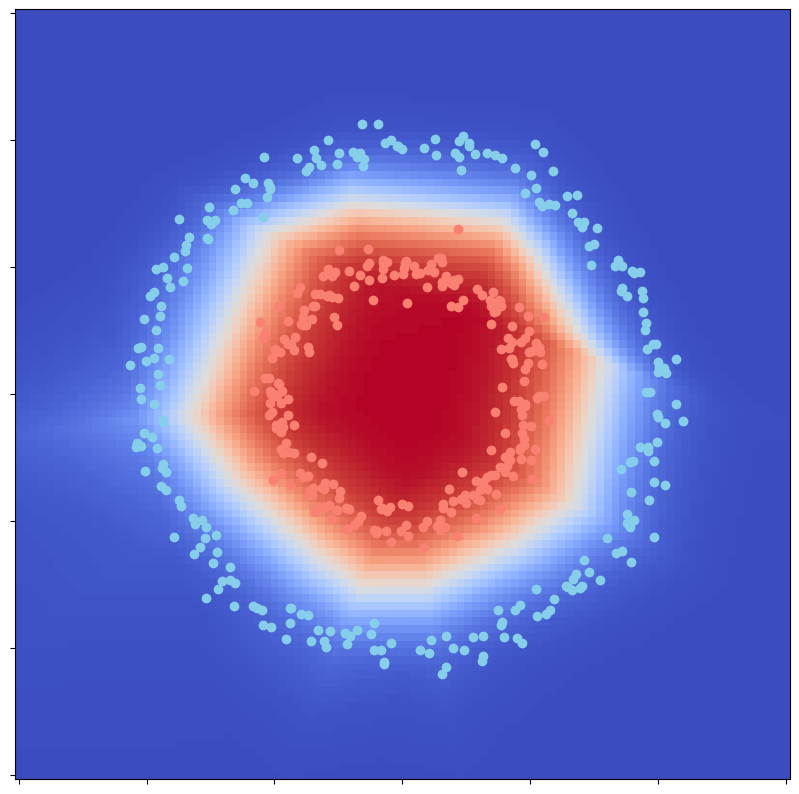

In [20]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Defincion de los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])


# https://medium.com/thedeephub/learning-rate-and-its-strategies-in-neural-network-training-270a91ea0e5c
# learning rate
# It dictates the magnitude of the steps the model takes during gradient descent,
# which is the technique used to minimize the loss function — a
# quantification of the error between the network’s predictions and the actual outcomes
Ir = 0.01 # learning rate


nn = [2, 16, 8, 1] # nimero de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de v.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = [] # Aqui guardaremos la evolucién de las predicción, para la animación.

with tf.Session() as sess:
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
    # Evaluamos al optimizador, a la función de coste y al tensor de salida py.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    # Cada 25 iteraciones, impriminos métricas.
    if step % 25 == 0:
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      # Iapresion de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción px.
      _pY = sess.run(pY, feed_dict={ iX : _px }).reshape((res, res))
      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)

#---- CÓDIGO ANIMACIÓN ----- #
ims = []
fig = plt. figure(figsize=(10, 10))
print("--- Generando animación ---")
for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  # visualizacién de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  # plt.title("Resultado Clasificación)
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML (ani.to_html5_video())





In [18]:
#Keras

import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD as LegacySGD
from IPython.core.display import display, HTML

lr = 0.01 # learning rate

nn = [2, 16, 8, 1] # nimero de neuronas por capa.

# Creamos el objeto que contendra a nuestra red neuronal, como

# secuencia de capas.

model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos 1a capa 2
l2 = model .add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos 1a capa 3

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la funcidn de coste y el optimizador.
model.compile(loss='mse', optimizer = LegacySGD(learning_rate=0.05), metrics=['acc'])
# Y entrenamos al modelo. Los callbacks

model.fit(X, Y, epochs=100)

Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 242us/sample - loss: 0.2450 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 70us/sample - loss: 0.2432 - acc: 0.5120
Epoch 3/100
500/500 [==============================] - 0s 64us/sample - loss: 0.2414 - acc: 0.5220
Epoch 4/100
500/500 [==============================] - 0s 66us/sample - loss: 0.2396 - acc: 0.5400
Epoch 5/100
500/500 [==============================] - 0s 73us/sample - loss: 0.2378 - acc: 0.5560
Epoch 6/100
500/500 [==============================] - 0s 104us/sample - loss: 0.2358 - acc: 0.6060
Epoch 7/100
500/500 [==============================] - 0s 69us/sample - loss: 0.2340 - acc: 0.7060
Epoch 8/100
500/500 [==============================] - 0s 83us/sample - loss: 0.2321 - acc: 0.7460
Epoch 9/100
500/500 [==============================] - 0s 151us/sample - loss: 0.2301 - acc: 0.7600
Epoch 10/100
500/500 [==============================] - 0s 158us/sample - loss: 0.228

In [19]:
# skilearn
import sklearn as sk
import sklearn.neural_network
from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por Capa.

# Creamos el objeto del modelo de red neuronal multicapa.

clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size=64)

# Y lo entrenamos con nuestro datos.

clf.fit(X, Y)

Iteration 1, loss = 1.23373414
Iteration 2, loss = 0.46998773
Iteration 3, loss = 0.13995501
Iteration 4, loss = 0.15719156
Iteration 5, loss = 0.14294210
Iteration 6, loss = 0.12401485
Iteration 7, loss = 0.12292416
Iteration 8, loss = 0.12249505
Iteration 9, loss = 0.12172713
Iteration 10, loss = 0.12061459
Iteration 11, loss = 0.12021344
Iteration 12, loss = 0.11968859
Iteration 13, loss = 0.11904610
Iteration 14, loss = 0.11848004
Iteration 15, loss = 0.11775110
Iteration 16, loss = 0.11687645
Iteration 17, loss = 0.11602369
Iteration 18, loss = 0.11520801
Iteration 19, loss = 0.11411362
Iteration 20, loss = 0.11333065
Iteration 21, loss = 0.11188706
Iteration 22, loss = 0.11082499
Iteration 23, loss = 0.10935609
Iteration 24, loss = 0.10790947
Iteration 25, loss = 0.10641187
Iteration 26, loss = 0.10460882
Iteration 27, loss = 0.10288538
Iteration 28, loss = 0.10093798
Iteration 29, loss = 0.09880454
Iteration 30, loss = 0.09660437
Iteration 31, loss = 0.09439836
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)